In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
from glob import glob

In [2]:
from fer import FER
import cv2

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
image = cv2.imread("munbyul.jpg")
detector = FER()
detection = detector.detect_emotions(image)
print(detection)

image = np.stack([image[:, :, 2], image[:, :, 1], image[:, :, 0]], 2)
detection = detector.detect_emotions(image)
print(detection)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


11-10-2020:23:04:28,907 WARNING  [deprecation.py:323] From /Users/joowhan/opt/anaconda3/envs/twitch_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/training_v1.py:2070: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


[OrderedDict([('box', (378, 85, 213, 213)), ('emotions', {'angry': 0.01, 'disgust': 0.0, 'fear': 0.65, 'happy': 0.0, 'sad': 0.19, 'surprise': 0.13, 'neutral': 0.01})]), OrderedDict([('box', (409, 250, 127, 127)), ('emotions', {'angry': 0.12, 'disgust': 0.0, 'fear': 0.07, 'happy': 0.27, 'sad': 0.44, 'surprise': 0.01, 'neutral': 0.09})])]
[OrderedDict([('box', (386, 89, 196, 196)), ('emotions', {'angry': 0.01, 'disgust': 0.0, 'fear': 0.35, 'happy': 0.01, 'sad': 0.13, 'surprise': 0.46, 'neutral': 0.04})])]


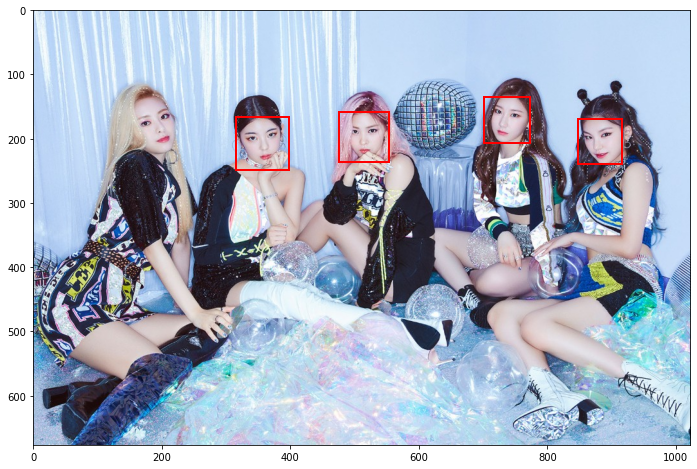

[{'angry': 0.02, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.29, 'sad': 0.03, 'surprise': 0.02, 'neutral': 0.63}, {'angry': 0.01, 'disgust': 0.0, 'fear': 0.05, 'happy': 0.13, 'sad': 0.08, 'surprise': 0.01, 'neutral': 0.73}, {'angry': 0.02, 'disgust': 0.0, 'fear': 0.6, 'happy': 0.01, 'sad': 0.08, 'surprise': 0.03, 'neutral': 0.27}, {'angry': 0.02, 'disgust': 0.01, 'fear': 0.23, 'happy': 0.03, 'sad': 0.1, 'surprise': 0.27, 'neutral': 0.34}]


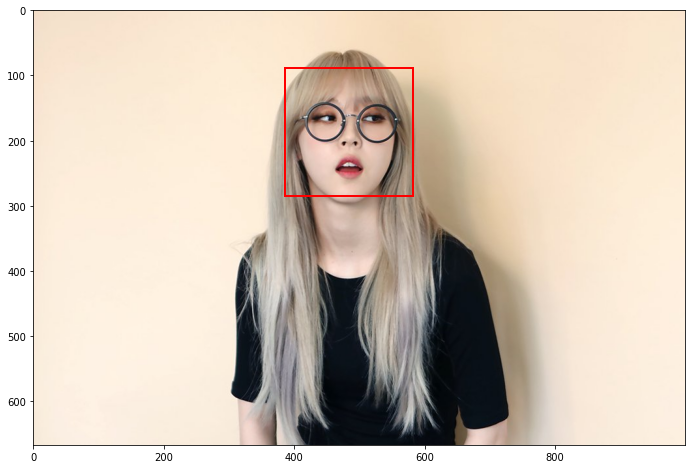

[{'angry': 0.01, 'disgust': 0.0, 'fear': 0.35, 'happy': 0.01, 'sad': 0.13, 'surprise': 0.46, 'neutral': 0.04}]


In [4]:
# image = face_recognition.load_image_file("munbyul.jpg")
# face_locations = face_recognition.face_locations(image)
# print(face_locations)

files = sorted(glob('*.jpg'))[0:3]

for file in files:

    image = cv2.imread(file)

    image = np.stack([image[:, :, 2], image[:, :, 1], image[:, :, 0]], 2)

    fig, ax = plt.subplots(figsize=(18, 8))
    ax.imshow(image)
    
    detection = detector.detect_emotions(image)

    face_locations = [det['box'] for det in detection]
    emotions = [det['emotions'] for det in detection]

    for x1, y1, x2, y2 in face_locations:
    #     rect = patches.Rectangle((y1, x1), y2 - y1, x2 - x1, edgecolor='r', facecolor="none", linewidth=2)
        rect = patches.Rectangle((x1, y1), x2, y2, edgecolor='r', facecolor="none", linewidth=2)
        ax.add_patch(rect)

    plt.show()

    print(emotions)
